# Geography 132 -- Assignment #2
**Due Feb. 8, 2021, 12:30 pm**
>### Instructions 
>
>  **When you submit this assignment, replace "GEOG132" with your LAST NAME**, then download from Jupyter as an *HTML file*, and upload to GauchoSpace.
>
> For this assignment you will analyze spatial and temporal patterns in water quality in Campus Lagoon. The goals for this assignment are to:
> - learn to make plots showing spatial data in Python
> - interpret the observations in the context of possible physical drivers
> - think about coastal ecosystems using a control volume approach
> - link space and time through flow rates
> 
> #### The Situation 
> 
> You work for an environmental consulting company that has been hired to conduct a study of water quality conditions in UCSB's Campus Lagoon. Your company has been asked to, specifically, assess eutrophiciation and hypoxia concerns. You are in the early stages of Phase I of the project, which involves initial site characterization and baseline (dry weather) monitoring. Your boss asks you to produce a report that:
> - describes why and how nutrients and oxygen demand are linked in coastal waters
> - gives an overview of the lagoon
> - presents the results of your initial sampling effort
> - proposes a comprehensive monitoring plan for both dry and wet conditions
>
>### You are busy, and were able to hire someone to go collect data for you... These data include:
> ####  Water quality conditions in Campus Lagoon
>  The following were collected with a YSI 2030 Pro
> - temperature
> - conductivity
> - dissolved oxygen
>
> The above data were collected in a longitudinal transect (along the length of the lagoon) and sampled at both the surface and near the bed (when possible). 
> 
> Additionally, a PME MiniDOT was deployed for two weeks prior to the longitudinal samling. The resulting timeseries of temperature and dissolved oxygen in the lagoon is availabe to provide context to the point samples collected using the YSI.

# Background 
> **Write a two-part introduction**. The **first part** should describe how nutrient enrichment leads to eutrophiciation and hypoxia in coastal ecosystems. Your goal is to provide context for the reader to understand the data presented later in the report. This synthesis should come from the reading assignment (one chapter in each of the assigned textbooks).  The **second part** should introduce the reader to Campus Lagoon. The purpose here is to provide necessary context for a reader unfamiliar with the site. (Is it tidal? Where does the water come from? What are the physical dimensions? What's the local climate? Does wind matter?) 

#### Eutrophication
*Put your reading summary in this cell.*


#### Campus Lagoon

*Put your site overview in this cell.*


#  Methods
> Describe the instrumentation and water sampling methods.

*Put your methods description in this cell*

# Campus Lagoon dry season monitoring
> Make plots showing the spatial distribution of temperature, salinity, and dissolved oxygen in the lagoon.  Do the following:
> - For each parameter, plot the surface measurement from each station on a map. The value should be shown in color, using a scatterplot. There should be three subplot or subpanels, arranged in one row with three columns, such that there is a subplot for  each variable. An example of a single figure is provided on GauchoSpace. Call this Figure 1.
> - For each parameter, plot the surface and bottom (where available) measurements as a function of distance along the axis of the lagoon, using different line types for the surface and bottom. There should be one figure with three panels, with each panel containing two lines/set of points. An example is provided on GauchoSpace. Call this Figure 2.
> - Compare the timeseries of dissolved oxygen collected with the MiniDOT logger to weather conditions from the airport. Call this figure 3. Again, an example is provided on GauchoSpace.



In [1]:
# Insert/paste and modify the code here specifies the PYthon libraries you will need
import matplotlib.pyplot as plt    # basic plotting functions
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd                # dataframes (sort of like a python spreadsheet)
import numpy as np                 # math functions (e.g. sin(), cos())


In [2]:
# Place code here for reading in the necessary data. ("Reading in" means importing the contents
# of a textfile into memory within Python.) Again, use the examples on GauchoSpace
# You can use as many cells as you'd like
# Next, we load our data. This step uses "pandas" (which we renamed to "pd", above)

# Load a set of shoreline points. When plotted as a line, these show campus lagoon and the nearby coastline.
df_shoreline = pd.read_csv('../Data/shoreline.csv', sep=',', header=[0], na_values='NaN')  

# Also load a list of the storm drains you found along the lagoon.
df_drains = pd.read_csv('../Data/storm_drains.csv', sep=',', header=[0], na_values='NaN') 

# Read a file containing the measurements
lagoon_df = pd.read_csv('../Data/lagoon_data.csv', sep=',', header=[0], na_values='NaN')  

# We now have a dataframe called "lagoon_df". 
# df contains fields that correspond to the columns of our CSV file. 

# We can display this data frame by simply typing its name with nothing else
lagoon_df

,ID,station,time,lat,lon,max_depth,surf_temp,bot_temp,surf_sal,bot_sal,surf_DO,bot_DO,surf_OS,bot_OS
0,1,Lagoon Outflow,1256,34.40778,-119.85028,20,21.7,.,35.4,.,8.30,.,114.7,.
1,2,Floating Dock,1317,34.41139,-119.85028,120,22.6,21.7,35.1,35.4,8.94,7.15,126.0,99
2,3,UCEN Storm Drain,1328,34.41111,-119.84861,85,20.1,21.5,30.2,35.4,8.25,7.88,107.0,110.7
3,4,Eastside Park,1345,34.40833,-119.84389,45,22.2,21.9,33.5,33.6,10.98,9.92,158.2,151.2


In [3]:
# This cell block defines a function that will calculate the distance between two points
# Note that it only works over short distances--up to a few tens of kilometers. 
# Beyond that the distance returned will be underestimated. 
# You can copy and paste this function into your notebooks anywhere that you need to estimate distances
# 
# This function requires numpy to be imported as np
# import numpy as np

def distance_in_km(lat1, lon1, lat2, lon2):
    R = 6371; # Radius of the Earth in km

    phi = (lat1 + lat2)*0.5; # The average latitude
    dphi = lat2 - lat1;    # Change in latitude
    dtheta = lon2 - lon1;  # Change in longitude

    # Distance between two points on the Earth
    # Result is in km because radius of Earth is specified in km
    dy = R*np.sin(dphi/180*np.pi);                         # Change in y direction
    dx = R*np.cos(phi/180*np.pi)*np.sin(dtheta/180*np.pi); # Change in x direciton
    dist_in_km = np.sqrt(dx*dx + dy*dy)                    # Via pythagorean theorem
                  
    return dist_in_km
#Test
# Study Hall, at 34.41303, -119.85564ºE
distance_in_km(34.41593, -119.84523, 34.41303, -119.85564)

1.0079119157963874

In [4]:
# Next, we'll compute distance along the channel, 
# relative to the location of the first sample. 
# (This assumes that the samples are listed sequentially 
# from one end of the lagoon to the other.)


# Create a new "column" or series in the dataframe, to store our calculations
lagoon_df['dist_bw_stations'] = 0.0
lagoon_df['total_distance'] = 0.0

# Loop through the data points
# Note that we skip the first location (where the index equals 0)
for n in range(1, len(lagoon_df.index)):

    # Distance between two points on the Earth, using the function defined above
    dist_in_km = distance_in_km(lagoon_df.lat[n-1], lagoon_df.lon[n-1], lagoon_df.lat[n], lagoon_df.lon[n]) 

    # PUT THE RESULTS OF THE CALCULATION into the dataframe
    # this line says: put the value stored as "dist_in_km" into [row, column]
    lagoon_df.at[n,'dist_bw_stations'] = dist_in_km
    lagoon_df.at[n,'total_distance'] = lagoon_df.total_distance[n-1] + dist_in_km

# Inspect the dataframe to see the new columns
lagoon_df

,ID,station,time,lat,lon,max_depth,surf_temp,bot_temp,surf_sal,bot_sal,surf_DO,bot_DO,surf_OS,bot_OS,dist_bw_stations,total_distance
0,1,Lagoon Outflow,1256,34.40778,-119.85028,20,21.7,.,35.4,.,8.30,.,114.7,.,0.000000,0.000000
1,2,Floating Dock,1317,34.41139,-119.85028,120,22.6,21.7,35.1,35.4,8.94,7.15,126.0,99,0.401414,0.401414
2,3,UCEN Storm Drain,1328,34.41111,-119.84861,85,20.1,21.5,30.2,35.4,8.25,7.88,107.0,110.7,0.156331,0.557745
3,4,Eastside Park,1345,34.40833,-119.84389,45,22.2,21.9,33.5,33.6,10.98,9.92,158.2,151.2,0.532022,1.089767


In [5]:
# Put code here to get data from the Santa Barbara Airport
from datetime import datetime    
import requests       # For grabbing data via API
import json           # For parsing strings in json format
import pandas as pd   # For managing data

parameters = {'token': 'f0c7febd7f634e09a2de8b3a16119db6', 
              'stid':'ksba',
              'start':'201910100000', 
              'end':'201910240000',
              'obtimezone':'local', 
              'vars':'wind_speed,air_temp',
              'output':'json'}
response = requests.get('https://api.synopticdata.com/v2/stations/timeseries',
             params=parameters)
data = response.json()  # parse out json structure

df_ksba = pd.DataFrame() # Create empty dataframe
df_ksba['timestamp'] = datetime.now() # Initialize timestamp field (or column)

obs_time = data['STATION'][0]['OBSERVATIONS']['date_time']
# Loop through each line and convert the string into a "datetime" value
for n in range(0, len(obs_time)):
    df_ksba.at[n,'timestamp'] = datetime.strptime(obs_time[n][0:-5], "%Y-%m-%dT%H:%M:%S")

# Add the data from the wind speed and the air temperature
df_ksba['windspd'] = data['STATION'][0]['OBSERVATIONS']['wind_speed_set_1']
df_ksba['airtemp'] = data['STATION'][0]['OBSERVATIONS']['air_temp_set_1']

# Check out the table we made
df_ksba

,timestamp,windspd,airtemp
0,2019-10-09 17:00:00,3.09,18.0
1,2019-10-09 17:05:00,3.09,18.0
2,2019-10-09 17:10:00,2.57,19.0
3,2019-10-09 17:15:00,3.09,18.0
4,2019-10-09 17:20:00,3.60,18.0
...,...,...,...
4365,2019-10-23 16:45:00,1.54,27.0
4366,2019-10-23 16:50:00,1.54,27.0
4367,2019-10-23 16:53:00,1.54,27.2
4368,2019-10-23 16:55:00,2.57,27.0


In [6]:
# Put your code here to LOAD the MiniDOT data (found in minidot_data.csv), 
# Read a file containing the measurements
mdot_df = pd.read_csv('../Data/minidot_data.csv', sep=',', header=[0], na_values='NaN')  
mdot_df['timestamp'] = pd.to_datetime(mdot_df['timestamp'])
mdot_df

,timestamp,water_temp_degC,do_mgL,batt_volt
0,2019-10-09 12:48:00,21.96,9.03,3.20
1,2019-10-09 12:49:00,21.91,9.18,3.20
2,2019-10-09 12:50:00,21.97,9.21,3.20
3,2019-10-09 12:51:00,21.99,9.33,3.20
4,2019-10-09 12:52:00,22.00,9.40,3.20
...,...,...,...,...
20184,2019-10-23 13:12:00,22.05,11.97,3.14
20185,2019-10-23 13:13:00,22.02,11.87,3.14
20186,2019-10-23 13:14:00,22.08,11.74,3.14
20187,2019-10-23 13:15:00,22.08,11.60,3.14


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:121: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


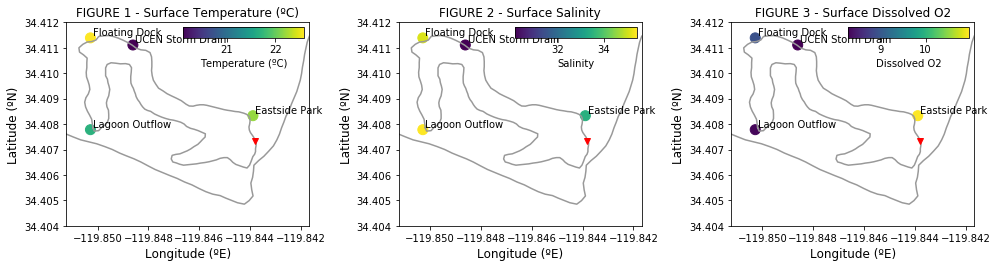

In [34]:
# FIGURE 1. 
# Create three color-coded scatter plots, overlaid on the shoreline points of Campus Point.
# Be sure to include the storm drain locations.
fig = plt.figure(figsize=(14,16)) #Trying to balance scale

##########################################################
ax = fig.add_subplot(1,3,1)
# Plot surface temperature as a scatter plot on the map. 
# scatter(X, Y, SIZE, COLOR)
pts1 = plt.scatter(
        lagoon_df.lon, 
        lagoon_df.lat,
        100,lagoon_df.surf_temp)

# Annotate the points with the station names
for n, txt in enumerate(lagoon_df.station):
    ax.annotate(txt, (lagoon_df.lon[n]+0.0001, lagoon_df.lat[n]+0.0001))


# Shoreline points
ax.plot(df_shoreline.longitude, df_shoreline.latitude, 
        '-', color=('0.6')) # solid gray line, no symbol
# See https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html for more colors/options...

# storm drains
ax.plot(df_drains.longitude, df_drains.latitude, 'rv') # Red triangle, no line

   
# Set the axis limits, format the tick marks
ax.set_aspect('equal', 'box')
ax.set(xlim=(df_shoreline.longitude.min(), df_shoreline.longitude.max()), 
       ylim=(34.404, 34.412))
ax.ticklabel_format(useOffset=False)  # This keep the longitude numbers looking normal...
    
# Add some labels
ax.set_ylabel("Latitude (ºN)", fontsize=12)   # Set the y axis label
ax.set_xlabel("Longitude (ºE)", fontsize=12)  # x axis label
ax.set_title("FIGURE 1 - Surface Temperature (ºC)", fontsize=12) # TITLE

# Add a colorbar
axins = inset_axes(ax, width="50%", height="5%", loc='upper right')
fig.colorbar(pts1, cax=axins, orientation="horizontal", label="Temperature (ºC)")
###################################################
bx = fig.add_subplot(1,3,2)
# Plot salinity as a scatter plot on the map. 
# scatter(X, Y, SIZE, COLOR)
pts2 = plt.scatter(
        lagoon_df.lon, 
        lagoon_df.lat,
        100,lagoon_df.surf_sal)
        

# Annotate the points with the station names
for n, txt in enumerate(lagoon_df.station):
    bx.annotate(txt, (lagoon_df.lon[n]+0.0001, lagoon_df.lat[n]+0.0001))


# Shoreline points
bx.plot(df_shoreline.longitude, df_shoreline.latitude, 
        '-', color=('0.6')) # solid gray line, no symbol
# See https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html for more colors/options...

# storm drains
bx.plot(df_drains.longitude, df_drains.latitude, 'rv') # Red triangle, no line

   
# Set the axis limits, format the tick marks
bx.set_aspect('equal', 'box')
bx.set(xlim=(df_shoreline.longitude.min(), df_shoreline.longitude.max()), 
       ylim=(34.404, 34.412))
bx.ticklabel_format(useOffset=False)  # This keep the longitude numbers looking normal...
    
# Add some labels
bx.set_ylabel("Latitude (ºN)", fontsize=12)   # Set the y axis label
bx.set_xlabel("Longitude (ºE)", fontsize=12)  # x axis label
bx.set_title("FIGURE 2 - Surface Salinity", fontsize=12) # TITLE

# Add a colorbar
bxins = inset_axes(bx, width="50%", height="5%", loc='upper right')
fig.colorbar(pts2, cax=bxins, orientation="horizontal", label="Salinity")
###################################

cx = fig.add_subplot(1,3,3)
# Plot Dissolved O2 as a scatter plot on the map. 
# scatter(X, Y, SIZE, COLOR)
pts3 = plt.scatter(
        lagoon_df.lon, 
        lagoon_df.lat,
        100,lagoon_df.surf_DO)
        

# Annotate the points with the station names
for n, txt in enumerate(lagoon_df.station):
    cx.annotate(txt, (lagoon_df.lon[n]+0.0001, lagoon_df.lat[n]+0.0001))


# Shoreline points
cx.plot(df_shoreline.longitude, df_shoreline.latitude, 
        '-', color=('0.6')) # solid gray line, no symbol
# See https://matplotlib.org/2.1.1/api/_as_gen/matplotlib.pyplot.plot.html for more colors/options...

# storm drains
cx.plot(df_drains.longitude, df_drains.latitude, 'rv') # Red triangle, no line

   
# Set the axis limits, format the tick marks
cx.set_aspect('equal', 'box')
cx.set(xlim=(df_shoreline.longitude.min(), df_shoreline.longitude.max()), 
       ylim=(34.404, 34.412))
cx.ticklabel_format(useOffset=False)  # This keep the longitude numbers looking normal...
    
# Add some labels
cx.set_ylabel("Latitude (ºN)", fontsize=12)   # Set the y axis label
cx.set_xlabel("Longitude (ºE)", fontsize=12)  # x axis label
cx.set_title("FIGURE 3 - Surface Dissolved O2", fontsize=12) # TITLE

# Add a colorbar
cxins = inset_axes(cx, width="50%", height="5%", loc='upper right')
fig.colorbar(pts3, cax=cxins, orientation="horizontal", label="Dissolved O2")

fig.tight_layout() # Spacing for figures attempt

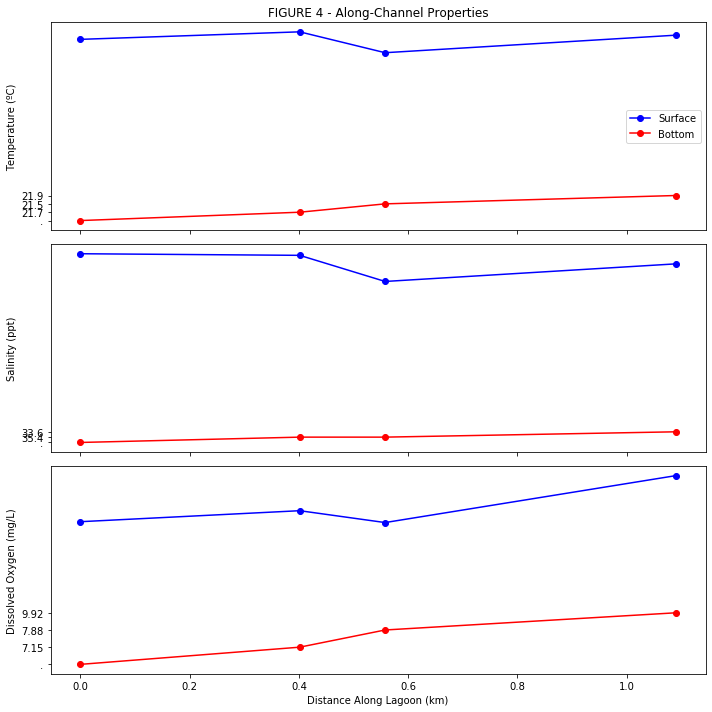

In [32]:
# Figure 2.
# Make a plot of water quality parameters along the axis of the estuary
# You should have three subplots, stacked on top of one another. 
# -- Top subplot(3,1,1): Temperature at the surface and bottom
# -- Middle subplot(3,1,2): Salinity at the surface and bottom
# -- Bottom subplot(3,1,3): Dissolved oxygen at the surface and bottom
# Only label the horizontal (distance) axis on th bottom plot, but be sure that all of the plots have the same bounds
# Also, be sure that you use the same color coding for the surface and bottom locations thorughout all of the panels.

# Set up a figure with a set of axes "ax"
# Create figure and specify subplot orientation (3 rows, 1 column), shared x-axis, and figure size
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,10)) 
###################################################################
# TEMPERATURE Data
ax1.plot(lagoon_df.total_distance,
        lagoon_df.surf_temp,
        'b-o',
        label="Surface")   

ax1.plot(lagoon_df.total_distance,
        lagoon_df.bot_temp,
        'r-o',
        label="Bottom")  
# Add some labels and a legend
# Note that we only want to set the xlabel on the last plot in the set of subpanels
# We can also get away with using a single legend, because all of the plots have the 
# show similar information
ax1.set_ylabel("Temperature (ºC)")# Set the y axis label
ax1.legend()
ax1.set_title("FIGURE 4 - Along-Channel Properties")
################################################################
# Salinity Data
ax2.plot(lagoon_df.total_distance,
        lagoon_df.surf_sal,
        'b-o',
        label="Surface")
ax2.plot(lagoon_df.total_distance,
        lagoon_df.bot_sal,
        'r-o',
        label="Bottom")
ax2.set_ylabel("Salinity (ppt)")
###################################################################
# Dissolved O2
ax3.plot(lagoon_df.total_distance,
        lagoon_df.surf_DO,
        'b-o',
        label="Surface")   
ax3.plot(lagoon_df.total_distance,
        lagoon_df.bot_DO,
        'r-o',
        label="Bottom")  
ax3.set_ylabel("Dissolved Oxygen (mg/L)")   # Set the y axis label
ax3.set_xlabel("Distance Along Lagoon (km)") #Set x-axis label
fig.tight_layout()

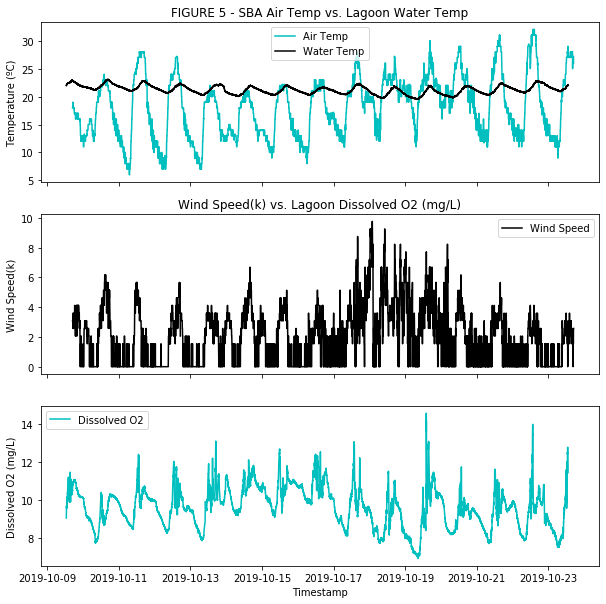

In [31]:
# Figure 3. 
# Make a timeseries plot that includes two subplots, arranged on on top of the other.
# -- Top subplot: Plot Airport air temperature and lagoon water temperature
# -- Bottom subplot: Plot airport wind speed and lagoon dissolved oxygen
# Be sure that both subplots have the same bounds for the horizontal (time) axes. 
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10,10)) 

ax1.plot(df_ksba.timestamp,
         df_ksba.airtemp,
        'c-',
        label="Air Temp")    
ax1.plot(mdot_df.timestamp,
        mdot_df.water_temp_degC,
        'k',
         label = "Water Temp")
ax1.set_ylabel("Temperature (ºC)") 
ax1.set_title("FIGURE 5 - SBA Air Temp vs. Lagoon Water Temp") 
ax1.legend()
#
ax2.plot(df_ksba.timestamp,
         df_ksba.windspd,
        'k',
        label="Wind Speed")
ax2.set_ylabel("Wind Speed(k)")
ax2.set_title("Wind Speed(k) vs. Lagoon Dissolved O2 (mg/L)")
ax2.legend()

ax3.plot(mdot_df.timestamp,
        mdot_df.do_mgL,
        'c-',
        label="Dissolved O2")
ax3.set_xlabel("Timestamp")
ax3.set_ylabel("Dissolved O2 (mg/L)")
ax3.legend()

## Discussion of results
> Describe the observations you made, speculating about the possible reasons for the observed patterns in temperature, salinity, and dissolved oxygen. How/why are the patterns between these three variables similar or different spatially across the lagoon? Do conditions in the lagoon appear to be affected by the weather conditions? What other information might be useful to help interpret the timeseries? 


*Put your discussion here*


# Sampling recommendations
> Our sampling efforts were clearly limited by resources (what we could measure) and access (where/how we could measure). Provide a recommendation for where, how, and when you should conduct a sampling campaign to properly characterize water quality in the lagoon during both dry and wet seasons. Would you change the spacing of the stations? 

*Put your recommended sampling strategy here*